## 1.Downloading and Installing Libraries

In [2]:
!pip install pandas
!pip install numpy
!pip install scikit-learn
!pip install matplotlib
!pip install nltk
!pip install seaborn
!pip install wordcloud

In [3]:
import numpy as np
import pandas as pd
import nltk
nltk.download('punkt')
import seaborn as sns

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [4]:
df = pd.read_csv('spam.csv', encoding='ISO-8859-1')

In [5]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
2025,ham,"Yes obviously, but you are the eggs-pert and t...",NaN,NaN,NaN
5136,ham,There are some nice pubs near here or there is...,NaN,NaN,NaN
2932,ham,Yo do you know anyone &lt;#&gt; or otherwise...,NaN,NaN,NaN
875,spam,"Shop till u Drop, IS IT YOU, either 10K, 5K, å...",NaN,NaN,NaN
1802,ham,Ok lor thanx... ÌÏ in school?,NaN,NaN,NaN


In [6]:
df.shape

(5572, 5)

## 2.Data Cleaning

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [8]:
# droping unnecessary columns
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'], inplace=True)

In [9]:
df.sample(5)

,v1,v2
5167,ham,Oh did you charge camera
1968,ham,2 laptop... I noe infra but too slow lar... I ...
4871,ham,Hi dis is yijue i would be happy to work wif Ì...
5193,ham,"It's wylie, you in tampa or sarasota?"
5566,spam,REMINDER FROM O2: To get 2.50 pounds free call...


In [10]:
# renaming column names
df.rename(columns={'v1':'Target','v2':'Text'},inplace=True)

In [11]:
df.sample(5)

,Target,Text
301,ham,"Shit that is really shocking and scary, cant i..."
2098,ham,"No dice, art class 6 thru 9 :( thanks though. ..."
3253,ham,I can make lasagna for you... vodka...
1487,ham,I told your number to gautham..
2468,ham,Lol well don't do it without me. We could have...


In [12]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [13]:
df['Target'] = encoder.fit_transform(df['Target'])

In [14]:
df.head()

,Target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [15]:
# checking for null values
df.isnull().sum()

Target    0
Text      0
dtype: int64

In [16]:
# checking for duplicates
df.duplicated().sum()

403

In [17]:
# removing duplicates
df = df.drop_duplicates(keep='first')
df.duplicated().sum()

0

In [18]:
# unique value
df.shape

(5169, 2)

## 3.EDA

In [19]:
df['Target'].value_counts()

Target
0    4516
1     653
Name: count, dtype: int64

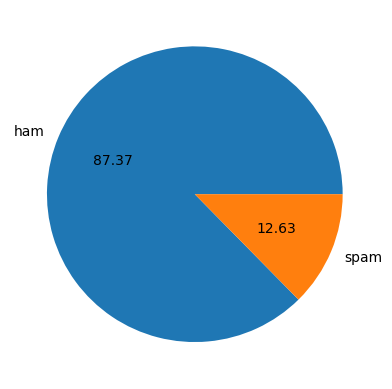

In [20]:
# making pie chart of percentage of spam & ham messages
import matplotlib.pyplot as plt
plt.pie(df['Target'].value_counts(), labels=['ham','spam'], autopct="%0.2f")
plt.show()

In [21]:
# balancing the imbalanced data

In [22]:
# making column of no. of character in a sentance
df.loc[:, 'num_characters'] = df['Text'].apply(len)
df.head()

,Target,Text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [23]:
# making column of no. of words in a sentance
df.loc[:,'num_words'] = df['Text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [24]:
df.head()

,Target,Text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [25]:
df.loc[:,'num_sentance'] = df['Text'].apply(lambda x:len(nltk.sent_tokenize(x)))
df.head()

,Target,Text,num_characters,num_words,num_sentance
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [26]:
df[['num_characters','num_words','num_sentance']].describe()

,num_characters,num_words,num_sentance
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [27]:
# analyzing ham messages
df[df['Target']==0][['num_characters','num_words','num_sentance']].describe()

,num_characters,num_words,num_sentance
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [28]:
# analyzing spam messages
df[df['Target']==1][['num_characters','num_words','num_sentance']].describe()

,num_characters,num_words,num_sentance
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<Axes: xlabel='num_characters', ylabel='Count'>

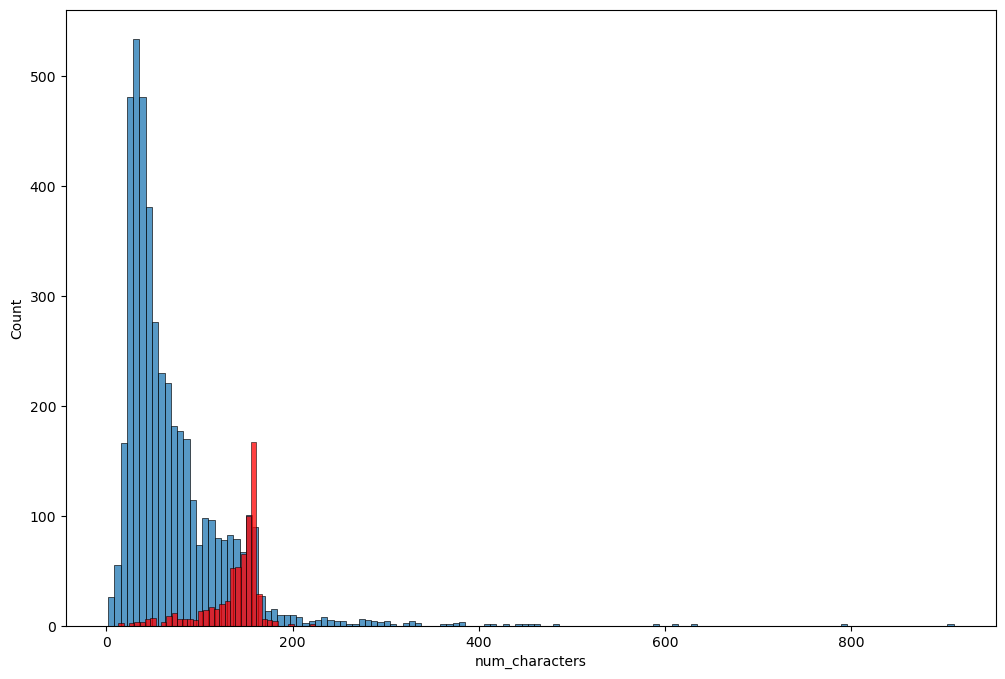

In [29]:
plt.figure(figsize=(12,8))
sns.histplot(df[df['Target']==0]['num_characters'])
sns.histplot(df[df['Target']==1]['num_characters'],color='red')

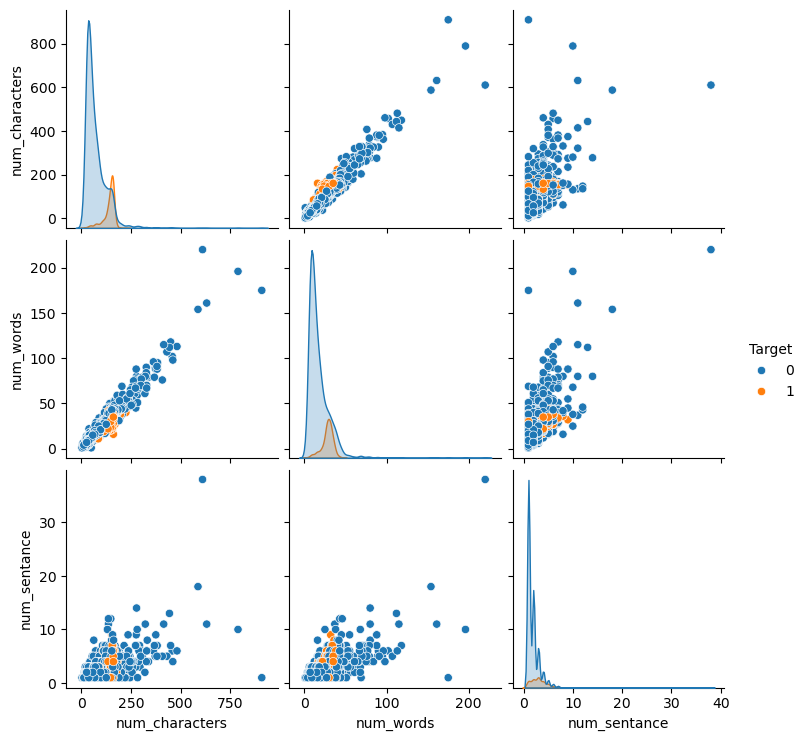

In [30]:
sns.pairplot(df,hue='Target')

<Axes: >

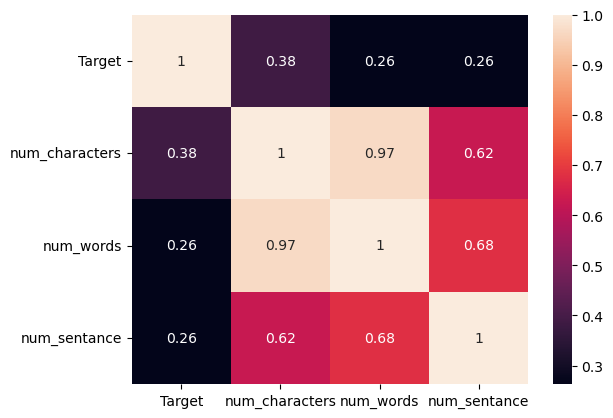

In [31]:
sns.heatmap(df.select_dtypes(include=['number']).corr(), annot=True)

## 4. Data Preprocessing
- Lower case
- Tokenization
- Removing special characters
- Removing stop words and punctuation
- Stemming

In [32]:
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

# Download necessary resources
nltk.download('stopwords')

# Initialize the stemmer
ps = PorterStemmer()

def text_transform(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    text = y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text = y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
    return " ".join(y)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [33]:
df['transform_text'] = df['Text'].apply(text_transform)

In [34]:
df.head()

,Target,Text,num_characters,num_words,num_sentance,transform_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [35]:
from wordcloud import WordCloud
wc = WordCloud(height=500, width=500, min_font_size=10, background_color='white')

In [36]:
ham_wc = wc.generate(df[df['Target']==0]['transform_text'].str.cat(sep=" "))

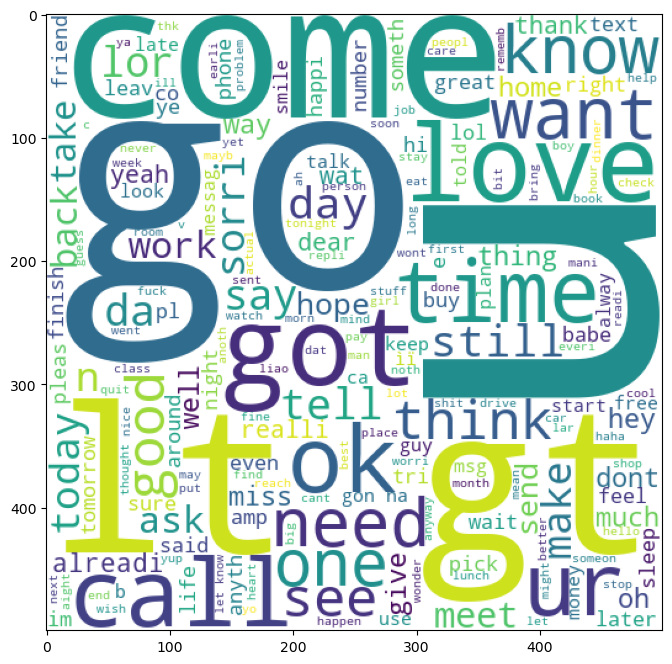

In [37]:
plt.figure(figsize=(14,8))
plt.imshow(ham_wc)

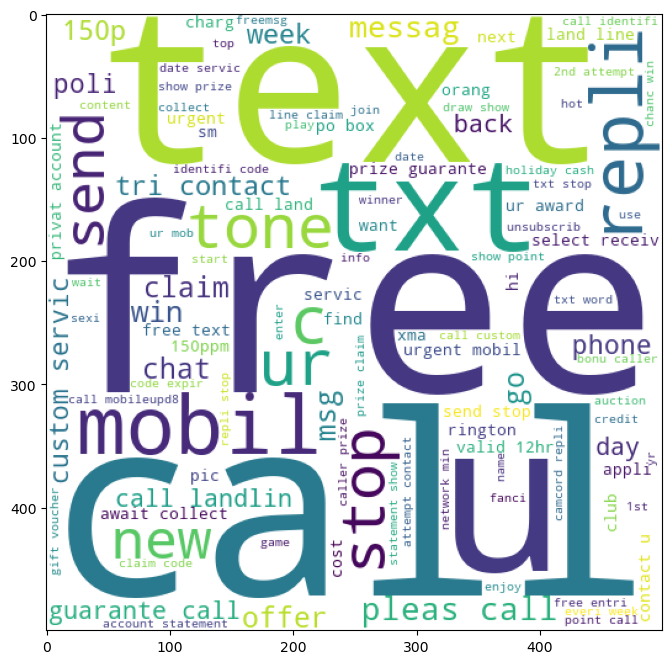

In [38]:
spam_wc = wc.generate(df[df['Target']==1]['transform_text'].str.cat(sep=" "))
plt.figure(figsize=(14,8))
plt.imshow(spam_wc)

In [39]:
spam_corpus=[]
for msg in df[df['Target']==1]['transform_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [40]:
len(spam_corpus)

9939

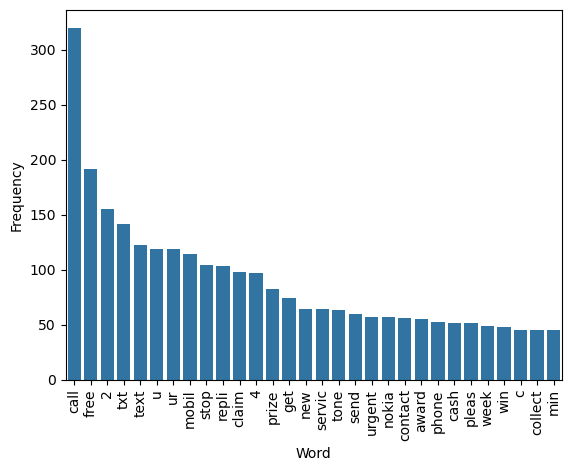

In [41]:
# ploting a barplot of 30 most frequent spam words

from collections import Counter
data = pd.DataFrame(Counter(spam_corpus).most_common(30), columns=['Word', 'Frequency'])
sns.barplot(x='Word', y='Frequency', data=data)
plt.xticks(rotation='vertical')
plt.show()

In [42]:
ham_corpus=[]
for msg in df[df['Target']==0]['transform_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

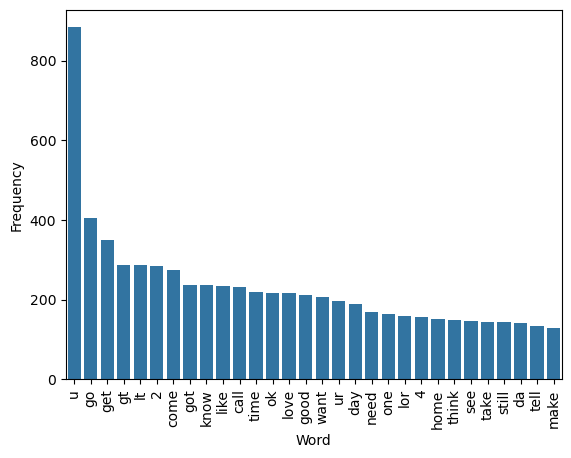

In [43]:
# ploting a barplot of 30 most frequent ham words

from collections import Counter
data = pd.DataFrame(Counter(ham_corpus).most_common(30), columns=['Word', 'Frequency'])
sns.barplot(x='Word', y='Frequency', data=data)
plt.xticks(rotation='vertical')
plt.show()

## 5. Model Building

In [47]:
# Text Vectorization

from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)   # Setting max_features to improve the accuracy & precision of the model
X = tfidf.fit_transform(df['transform_text']).toarray()

In [50]:
X.shape

(5169, 3000)

In [52]:
y = df['Target'].values

In [53]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [54]:
# Importing Naive Bayesian Model

from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [58]:
# Training 

clfs = {
    'GNB' : gnb,
    'MNB' : mnb,
    'BNB' : bnb
}

In [59]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [60]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  GNB
Accuracy -  0.8694390715667312
Precision -  0.5068493150684932
For  MNB
Accuracy -  0.9709864603481625
Precision -  1.0
For  BNB
Accuracy -  0.9835589941972921
Precision -  0.991869918699187


In [61]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [62]:
performance_df

,Algorithm,Accuracy,Precision
1,MNB,0.970986,1.000000
2,BNB,0.983559,0.991870
0,GNB,0.869439,0.506849


In [64]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [65]:
performance_df1

,Algorithm,variable,value
0,MNB,Accuracy,0.970986
1,BNB,Accuracy,0.983559
2,GNB,Accuracy,0.869439
3,MNB,Precision,1.000000
4,BNB,Precision,0.991870
5,GNB,Precision,0.506849


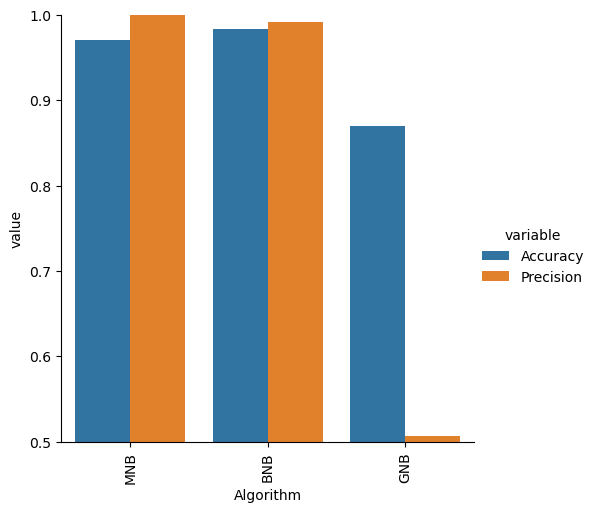

In [66]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

### Exporting ML Model

In [67]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))